## Outliers & Fehler
Analyse von möglichen Fehler und Ausreisser im Dataset

In [232]:
from sklearn.ensemble import GradientBoostingRegressor

import src.package.importer as im
import src.package.ml_helper as ml
import src.package.charts as charts
import src.package.consts as c
import seaborn as sns

# set size of seaborn plots
charts.set_plot_size(sns)

df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df = im.select_relevant_features(df, additional_features=[c.FIELD_ID])


#### Hohes HNF/GF Verhältnis

In [233]:
df[df[c.FIELD_HNF_GF_RATIO] > 0.95]

,id,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
1036,6273,FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__GA...,HALLEN,GLASSFASSADE_GLASSFASSADE,3880.0,NaN,3800.0,17250.0,NaN,1,1.0,0.0,5775000.0,3880.0,NaN,0.979381
1048,2282,LAGERBAUTEN__INDUSTRIEBAUTEN_GEWERBEBAUTEN__LA...,HALLEN,HOLZBAU_OHNE_MASSIVHOLZ,496.0,479.0,473.0,5175.0,NaN,1,1.0,0.0,1396000.0,496.0,7740.0,0.953629
1166,3136,GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_UNTER...,GESUNDHEIT,UNKNOWN,6456.0,NaN,7919.0,85637.0,NaN,1,2.0,3.0,153700000.0,6456.0,NaN,1.226611


#### HNF/GF Ratio Ausreisser

In [234]:
ratio_outliers = ml.get_outliers(df, c.FIELD_HNF_GF_RATIO, factor=2.3)
print(ratio_outliers[c.FIELD_ID].count())
ratio_outliers

17


,id,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
35,806,GESUNDHEITSBAUTEN__KRANKENHAEUSER_Logistik,BETRIEB,MASSIVBAU_EINFACH,10370.0,NaN,2336.0,NaN,48320.0,1,2.0,2.0,22263836.0,10370.0,18694.0,0.225265
61,893,LAGERBAUTEN_PRODUKTIONSBAUTEN,BETRIEB,MASSIVBAU_EINFACH,31315.0,NaN,7585.0,NaN,154975.0,1,4.0,2.0,NaN,NaN,NaN,0.242216
315,1421,VERKEHRSBAUTEN__PARKHAEUSER_OBERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,2138.0,2042.0,1970.0,NaN,5177.0,1,2.0,1.0,1506706.0,2138.0,1616.0,0.921422
500,2366,SCHUTZBAUTEN__FEUERWEHRGEBAEUDE,BETRIEB,HOLZ_EINFACH,1628.0,NaN,1413.0,6864.0,7450.0,1,2.0,1.0,2940000.0,1628.0,3213.0,0.867936
577,2258,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,GLASSFASSADE_GLASSFASSADE,31770.0,31084.0,27782.0,204580.0,NaN,1,3.0,1.0,40800000.0,31770.0,39373.0,0.874473
607,1790,VERKEHRSBAUTEN__PARKHAEUSER_UNTERIRDISCH,HALLEN,NICHT_ISOLIERT_BETON,9515.0,9020.0,8413.0,30225.0,NaN,1,2.0,4.0,16821000.0,9515.0,9017.0,0.884183
610,1808,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,HOLZ_EINFACH,11770.0,10974.0,10265.0,123571.0,NaN,1,4.0,0.0,28121260.0,11770.0,23524.0,0.872133
719,1391,VERKEHRSBAUTEN__WERKHOEFE,BETRIEB,NICHT_ISOLIERT_BETON,176.0,161.0,161.0,768.0,NaN,1,0.8,0.2,860200.0,176.0,736.0,0.914773
786,1454,VERKEHRSBAUTEN__ZOLL,BETRIEB,SICHTBETONFASSADE_BACKSTEIN,792.0,NaN,119.0,2700.0,NaN,1,2.0,0.5,NaN,NaN,NaN,0.150253
793,2066,VERKEHRSBAUTEN__SEILBAHNEN,BETRIEB,UNKNOWN,2560.0,2304.0,226.0,16252.0,NaN,1,3.0,0.0,9750000.0,NaN,NaN,0.088281


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratio_hnf_gf'>

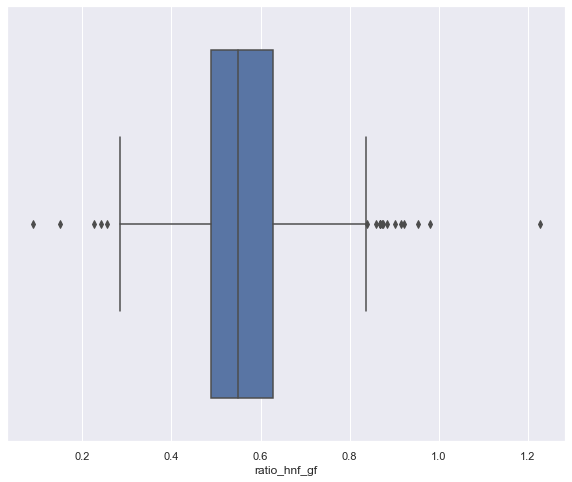

In [235]:
sns.boxplot(df[c.FIELD_HNF_GF_RATIO])

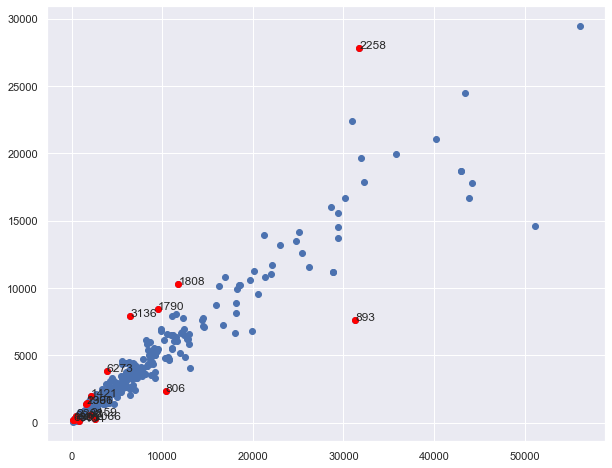

In [236]:
charts.scatter_highlight(df, ratio_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)

#### HNF Ausreisser

In [237]:
hnf_outliers = ml.get_outliers(df, c.FIELD_AREA_MAIN_USAGE, factor=3)
hnf_outliers

,id,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
287,737,BUEROBAUTEN__VOLLAUSBAU,BUERO,GLASSFASSADE_GLASSFASSADE,44190.0,NaN,17767.0,183052.0,212300.0,1,6.0,1.0,205066620.0,44190.0,22339.0,0.402059
465,1577,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_BACKSTEIN,32313.0,NaN,17848.0,101056.0,NaN,8,8.0,1.0,71270000.0,32313.0,15353.0,0.552347
505,5978,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,NaN,31941.0,27430.0,19646.0,98864.0,NaN,8,NaN,0.0,65022360.0,31941.0,15350.0,0.615072
577,2258,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,GLASSFASSADE_GLASSFASSADE,31770.0,31084.0,27782.0,204580.0,NaN,1,3.0,1.0,40800000.0,31770.0,39373.0,0.874473
589,365,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,UNKNOWN,35855.0,NaN,19917.0,105163.0,NaN,7,NaN,0.0,56515536.0,35855.0,20615.0,0.555487
605,1586,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_GIPS,40267.0,31008.0,21038.0,124575.0,NaN,8,7.0,1.0,92800000.0,40267.0,26535.0,0.522463
668,1673,LAGERBAUTEN__INDUSTRIEHALLEN,HALLEN,HOLZBAU_EINFACH,30940.0,27060.0,22380.0,272000.0,NaN,1,3.0,1.0,29913966.0,30940.0,41000.0,0.723335
721,1403,SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN,SCHULEN,ZWEISCHALENMAUERWERK_SICHTMAUERWERK,56112.0,50240.0,29437.0,218120.0,NaN,1,4.0,3.0,162200000.0,56112.0,31171.0,0.524611
832,6090,NaN,NaN,NaN,42982.0,NaN,18707.0,NaN,157908.0,1,NaN,0.0,126370000.0,NaN,NaN,0.435229
904,1427,VERWALTUNGSBAUTEN,BUERO,MASSIVBAU_EINFACH,42982.0,39268.0,18707.0,157908.0,NaN,7,5.0,1.0,NaN,NaN,NaN,0.435229


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_main_usage'>

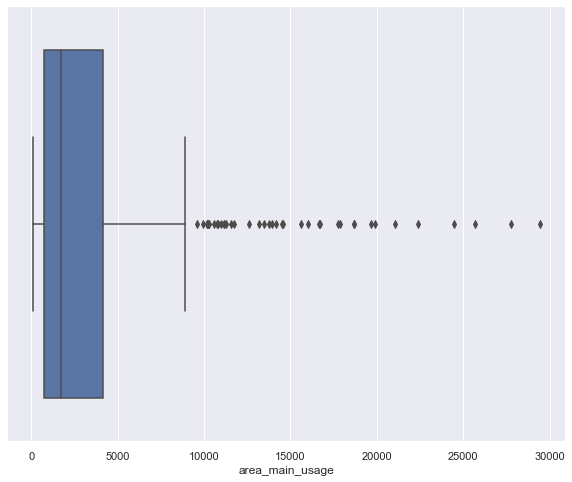

In [238]:
sns.boxplot(df[c.FIELD_AREA_MAIN_USAGE])

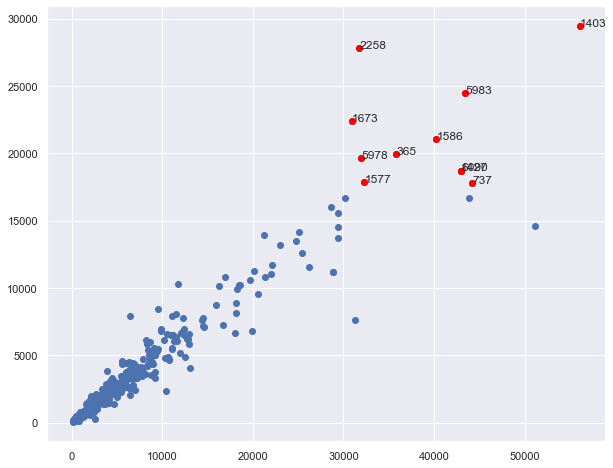

In [239]:
charts.scatter_highlight(df, hnf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)

#### GF Ausreisser

In [240]:
gf_outliers = ml.get_outliers(df, c.FIELD_AREA_TOTAL_FLOOR_416, factor=3)
gf_outliers

,id,nom_usage_main,usage_cluster,nom_facade,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
53,2105,KULTUR__KONGRESS,HALLEN,MASSIVBAU_EDEL,54551.0,NaN,NaN,NaN,270000.0,1,8.0,1.0,122965000.0,54551.0,9310.0,NaN
151,2852,VERKEHRSBAUTEN__POSTBETRIEBE,TECHNIK,MASSIVBAU_EDEL,41907.0,NaN,NaN,NaN,193352.0,1,6.0,2.0,79661822.0,41907.0,10382.0,NaN
175,359,BUEROBAUTEN__EDELROHBAU,BUERO,MASSIVBAU_EDEL,75328.0,NaN,NaN,NaN,315370.0,1,7.0,1.0,147958243.0,75328.0,20058.0,NaN
203,521,GESUNDHEITSBAUTEN__UNIVERSITAETSKLINIKEN_UNTER...,GESUNDHEIT,MASSIVBAU_EDEL,33950.0,NaN,NaN,NaN,134400.0,1,6.0,3.0,124642000.0,33950.0,NaN,NaN
281,539,WOHNBAUTEN__MFH_LOW,WOHNEN,SICHTBETONFASSADE_BETONSANDWICHELEMENT,49074.0,NaN,NaN,160000.0,172739.0,28,4.0,1.0,91700000.0,49074.0,37841.0,NaN
287,737,BUEROBAUTEN__VOLLAUSBAU,BUERO,GLASSFASSADE_GLASSFASSADE,44190.0,NaN,17767.0,183052.0,212300.0,1,6.0,1.0,205066620.0,44190.0,22339.0,0.402059
320,2183,VERWALTUNGSBAUTEN,BUERO,MASSIVBAU_EDEL,36051.0,NaN,NaN,110574.0,122860.0,2,5.0,3.0,87700000.0,36051.0,11800.0,NaN
353,2165,WOHNBAUTEN__MFH_MEDIUM,WOHNEN,SICHTBETONFASSADE_BACKSTEIN,43559.0,NaN,NaN,144207.0,160230.0,7,9.0,1.0,73100000.0,43559.0,13647.0,NaN
420,647,WOHNBAUTEN__MFH_LOW,WOHNEN,HOLZ_EINFACH,60050.0,NaN,NaN,201478.0,219172.0,12,5.0,1.0,84170000.0,60050.0,32939.0,NaN
440,2090,VERKEHRSBAUTEN__FLUG__VERWALTUNG,BUERO,UNKNOWN,36104.0,NaN,NaN,129575.0,154437.0,3,NaN,0.0,89560000.0,36104.0,NaN,NaN


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area_total_floor_416'>

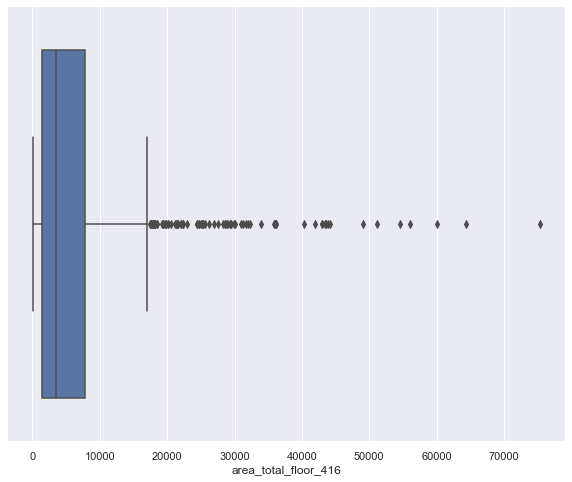

In [241]:
sns.boxplot(df[c.FIELD_AREA_TOTAL_FLOOR_416])

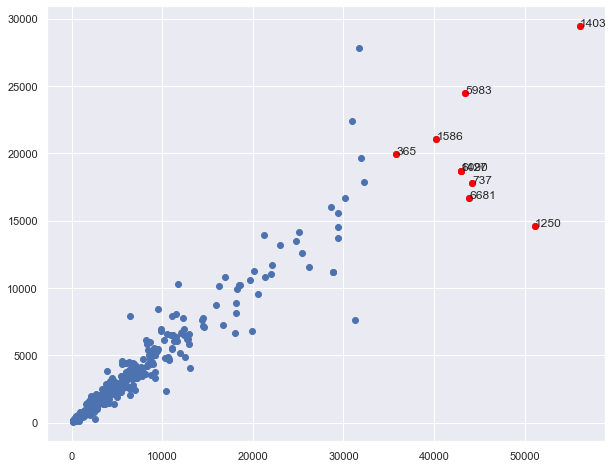

In [242]:
charts.scatter_highlight(df, gf_outliers, c.FIELD_AREA_TOTAL_FLOOR_416, c.FIELD_AREA_MAIN_USAGE)